In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import glob

from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import *
from keras.layers.merge import concatenate
from keras.layers import Input, merge, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Cropping2D
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from skimage.util import img_as_float

C:\Python\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
# make config

rows = 128
cols = 256
train_path = "5"
label_path = "label1"
img_type = "jpg"
test_path = "test1"
npy_path = "npydata1"

In [13]:
def create_data(data_path_img, data_path_labels, npy_path, rows, cols, img_type = "jpg"):   
    imgs = glob.glob("data\\" + data_path_img + "\\*." + img_type)
    #labels = glob.glob("data\\" + data_path_labels + "\\*." + img_type)
    img_count = len(imgs)
    imgs_data = np.ndarray((img_count, rows, cols, 1))
    #labels_data = np.ndarray((img_count, rows, cols, 1))
    for i in range(len(imgs)):
        #img_name = img_full_name[img_full_name.rindex("\\") + 1:]
        img = load_img(imgs[i])
        #label = load_img(labels[i])
        img = img_as_float(img)
        #label = img_as_float(label)
        segments_slic = slic(img, n_segments=250, compactness=10, sigma=1)
        segment_mean = scipy.ndimage.measurements.mean(img[:,:,0], segments_slic, range(250))
        img = segment_mean[segments_slic]
        #segment_mean = scipy.ndimage.measurements.mean(label[:,:,0], segments_slic, range(250))
        #label = segment_mean[segments_slic]
        imgs_data[i] = np.expand_dims(img, axis = 2)
        #labels_data[i] = np.expand_dims(label, axis = 2)
        if i % 10 == 0:
            print('Done: {0}/{1} images'.format(i, img_count))
    print('Created.')
    np.save("data\\" + npy_path + '\\imgs_' + data_path_img + '.npy', imgs_data)
    #np.save("data\\" + npy_path + '\\imgs_' + data_path_labels + '.npy', labels_data)
    print('Saving to .npy files done.')

In [5]:
plt.imshow(np.expand_dims(test1, axis = 2)[:,:,0])

NameError: name 'test1' is not defined

In [34]:
create_data(train_path, label_path, npy_path, rows, cols)

Done: 0/1 images
Created.
Saving to .npy files done.


C:\Python\lib\site-packages\scipy\ndimage\measurements.py:639: RuntimeWarning: invalid value encountered in true_divide
  return sum / numpy.asanyarray(count).astype(numpy.float)


In [87]:
print(test1)

None


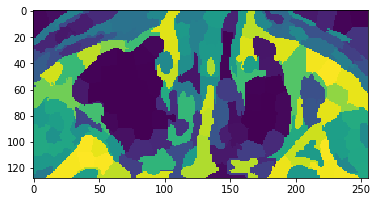

In [81]:
plt.imshow(test1[0][:,:,0])

In [29]:
%matplotlib inline

In [31]:
test.shape

(128, 256)

In [5]:
imgs = glob.glob("data\\train\\*.jpg")

In [11]:
img_full_name

'data\\train\\1.jpg'

In [10]:
img_full_name[img_full_name.rindex("\\") + 1:]

'1.jpg'

In [6]:
def load_data(data_path, npy_path, process_colors = False):
    imgs = np.load("data\\" + npy_path + '\\imgs_' + data_path + '.npy')
    imgs = imgs.astype('float32')
    imgs /= 255

    if (process_colors):
        imgs[imgs > 0.5] = 1
        imgs[imgs <= 0.5] = 0
    return imgs

In [35]:
test = load_data(train_path, npy_path)

In [17]:
%matplotlib inline

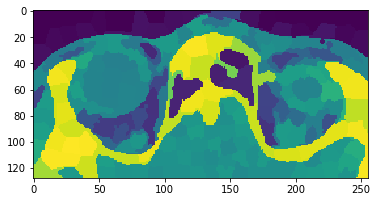

In [36]:
plt.imshow(img_as_float(test[0][:,:,0]))

In [38]:
img = array_to_img(test[0])
img.save("data\\123\\1.jpg") 

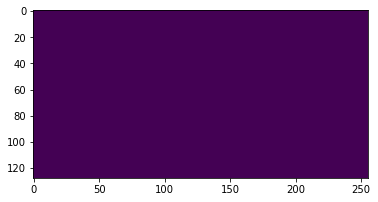

In [50]:
plt.imshow(test[10][:,:,0])